In [62]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report
import torch
import seaborn as sns



In [37]:
#checking the test and train directory
data_dir = r"C:\Users\mahek\mahek\.ipynb_checkpoints\A,B,CNNS_with_Tim\A,B,CNNS_with_Tim\veggie_heap_training"
test_dir=r"C:\Users\mahek\mahek\.ipynb_checkpoints\A,B,CNNS_with_Tim\A,B,CNNS_with_Tim\veggie_heap_testing"


In [38]:
#normalizing
batch_size=32
img_height=256
img_width=256
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)



Found 9835 files belonging to 12 classes.
Using 7868 files for training.


In [39]:
#taking some files for validation
batch_size=32
img_height=256
img_width=256
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 9835 files belonging to 12 classes.
Using 1967 files for validation.


In [40]:
#dealing with the test data
batch_size=32
img_height=256
img_width=256
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 2424 files belonging to 12 classes.
Using 484 files for validation.


In [41]:
class_names=train_ds.class_names
print(class_names)

["Apatosaur Aphie's Apples", "Bluplocephalus Bob's Blueberries", "Cherizinoasaur Cher's Cherries", "Corythosaurus Cory's Corn", "Grapthorina Greta's Grapes", "Pachycephalosaurus Perry's Peaches", "Pepteranodon Pep's Peppers", "Potoceratops Pott's Potatoes", "Rhaspdodon Ribery's Raspberries", "Stribecosaurus Stan's Strawberries", "Thyreosaur Tim's Thyme", 'vacation_photos']


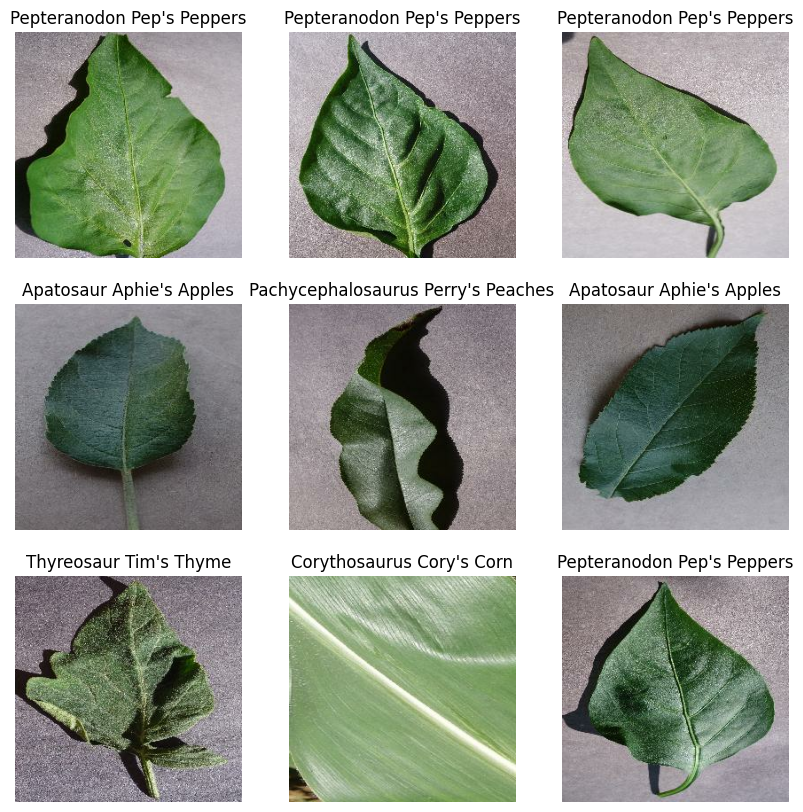

In [ ]:
#this is just to visuzlize the data
plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [47]:
#getting batches of images
for image_batch,label_batch in train_ds:
    print(image_batch.shape)
    print(label_batch.shape)
    break



(32, 256, 256, 3)
(32,)


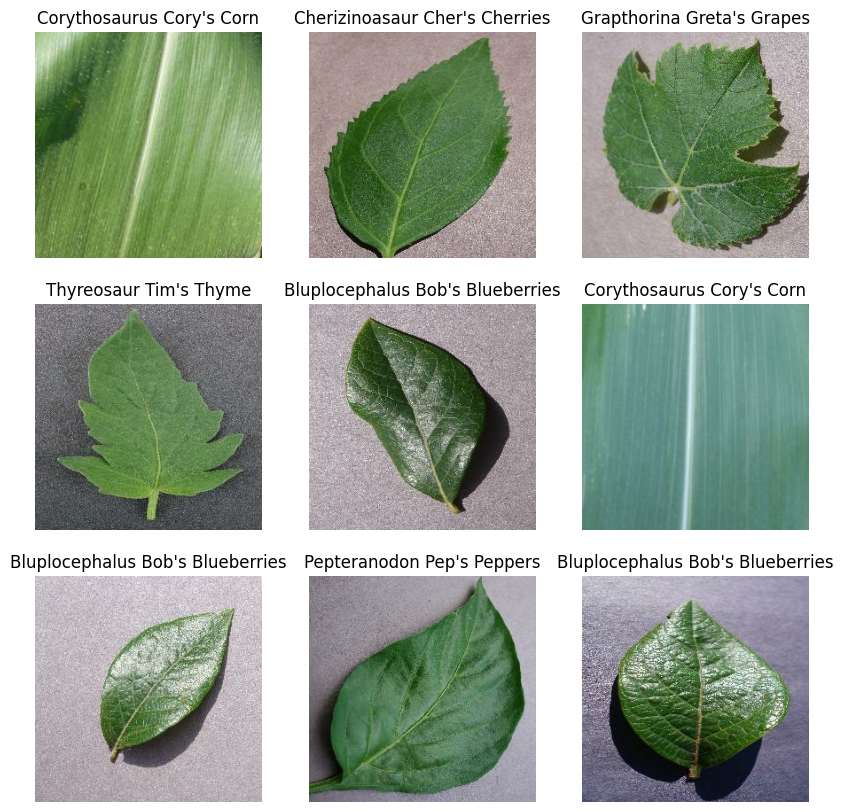

In [ ]:
#visualizing these batches of images 
image_batch, label_batch = next(iter(train_ds))
plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].numpy().astype("uint8"))
  plt.title(class_names[label_batch[i]])
  plt.axis("off")
plt.show()

the rgb rchannel values are in the range[0,255] range. this is not ideal for a neural network therefore we need to make the input value small. here we will standardize the  values and make it[0,1] range by using tf.keras.util.Rescaling. we need to normalize the data for this we use 

In [49]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [50]:
#alternativer map to do the same
normalized_ds=train_ds.map(lambda x,y:(normalization_layer(x),y))
image_batch,label_batch=next(iter(normalized_ds))
first_image=image_batch[0]
print(np.min(first_image),np.max(first_image))


0.0 1.0


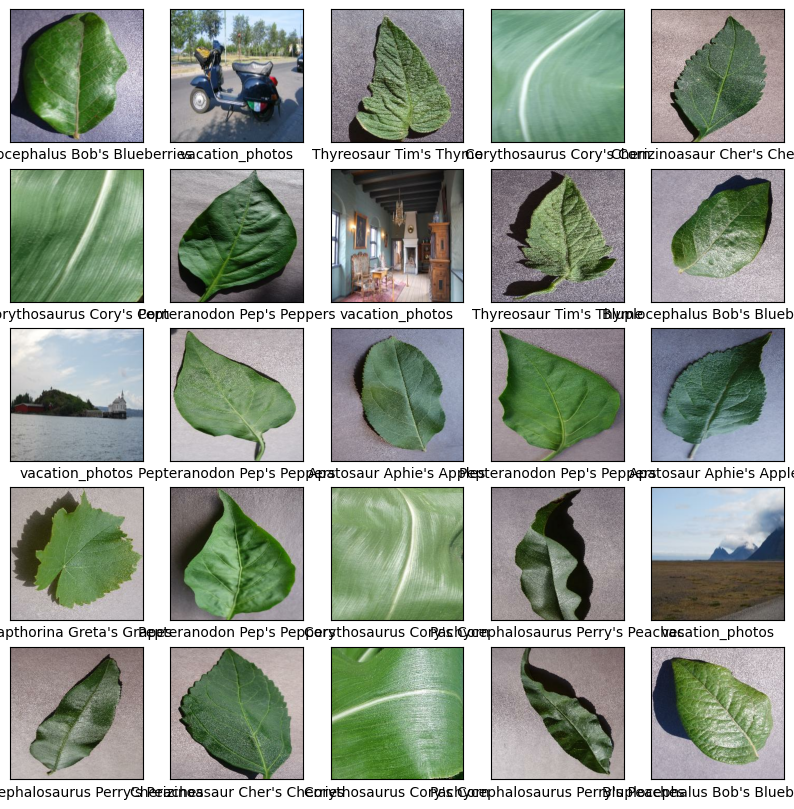

In [71]:
# Visualizing the normalized images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image_batch[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[label_batch[i]])
plt.show()


In [54]:
#now we train the model
model=tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(12,activation='softmax'),
])

we need compile the model now 

In [56]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)


now we fit the model

In [58]:
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 84s 342ms/step - accuracy: 0.8963 - loss: 0.3282 - val_accuracy: 0.9492 - val_loss: 0.1686
Epoch 2/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 88s 358ms/step - accuracy: 0.9562 - loss: 0.1429 - val_accuracy: 0.9593 - val_loss: 0.1383
Epoch 3/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 80s 326ms/step - accuracy: 0.9696 - loss: 0.0952 - val_accuracy: 0.8932 - val_loss: 0.3382
Epoch 4/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 83s 336ms/step - accuracy: 0.9816 - loss: 0.0534 - val_accuracy: 0.9375 - val_loss: 0.2127
Epoch 5/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 81s 329ms/step - accuracy: 0.9900 - loss: 0.0357 - val_accuracy: 0.9502 - val_loss: 0.1712
Epoch 6/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 85s 347ms/step - accuracy: 0.9925 - loss: 0.0242 - val_accuracy: 0.9431 - val_loss: 0.1780
Epoch 7/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 81s 330ms/step - accuracy: 0.9840 - loss: 0.0467 - val_accuracy: 0.9431 - val_loss: 0.2100
Epoch 8/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 85s 347ms/step - accuracy: 0.9952 - loss: 0

In [ ]:
loss, accuracy = model.evaluate(test_ds)
print(f"loss = {loss}\nAccuracy = {accuracy*100}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.6229 - loss: 3.5015
loss = 3.76320219039917
Accuracy = 59.29751992225647


In [61]:
y_pred = []
y_true = []

for images, labels in test_ds:
    predictions = model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)
    y_pred.extend(predicted_classes)
    y_true.extend(labels.numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


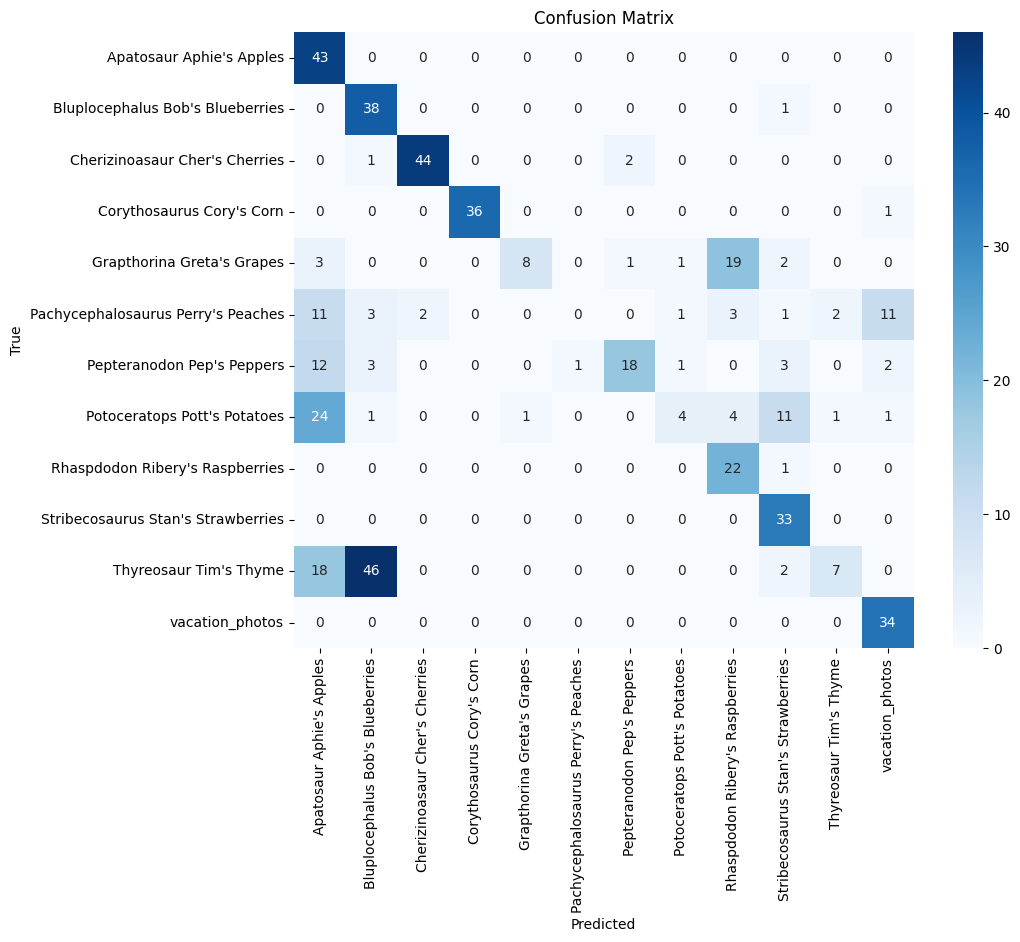

In [72]:
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [73]:
print(classification_report(y_true, y_pred, target_names=class_names))

                                    precision    recall  f1-score   support

          Apatosaur Aphie's Apples       0.39      1.00      0.56        43
  Bluplocephalus Bob's Blueberries       0.41      0.97      0.58        39
    Cherizinoasaur Cher's Cherries       0.96      0.94      0.95        47
         Corythosaurus Cory's Corn       1.00      0.97      0.99        37
        Grapthorina Greta's Grapes       0.89      0.24      0.37        34
Pachycephalosaurus Perry's Peaches       0.00      0.00      0.00        34
        Pepteranodon Pep's Peppers       0.86      0.45      0.59        40
      Potoceratops Pott's Potatoes       0.57      0.09      0.15        47
   Rhaspdodon Ribery's Raspberries       0.46      0.96      0.62        23
Stribecosaurus Stan's Strawberries       0.61      1.00      0.76        33
            Thyreosaur Tim's Thyme       0.70      0.10      0.17        73
                   vacation_photos       0.69      1.00      0.82        34

          

In [74]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
               color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(len(class_names)))
    plt.yticks([])
    thisplot = plt.bar(range(len(class_names)), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

# Displaying predictions for the first image in the test set
test_images, test_labels = next(iter(test_ds))
